Important Imports

In [1]:
import os
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

c:\Users\Salma\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Loading and normalizing datasets

In [4]:
def loadAndPreprocessImages(directory, img_size=(128, 128)):
    images = []
    labels = []
    Categories = {'T-shirts': 0, 'Trousers': 1, 'Shoes': 2, 'Glasses': 3}
    
    for label in os.listdir(directory):
        labelPath = os.path.join(directory, label)
        if os.path.isdir(labelPath):
            for imgFile in os.listdir(labelPath):
                imgPath = os.path.join(labelPath, imgFile)
                img = cv2.imread(imgPath)
                if img is not None:
                    img = cv2.resize(img, img_size)  # Resize image
                    #all images are(640,640) except trousers are 416
                    img = img / 255.0  # Normalize
                    images.append(img)
                    labels.append(Categories[label])                    
    return np.array(images), np.array(labels)

Splitting the dataset

In [5]:
# Load and preprocess datasets
train_dir = r'd:\Python\clothingClassifier\datasets\train'
val_dir = r'd:\Python\clothingClassifier\datasets\valid'
test_dir = r'd:\Python\clothingClassifier\datasets\test'
Categories = ['T-shirts', 'Trousers', 'Shoes', 'Glasses']
     
X_train, y_train = loadAndPreprocessImages(train_dir)
X_val, y_val = loadAndPreprocessImages(val_dir)
X_test, y_test = loadAndPreprocessImages(test_dir)

#Debugging Prints:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
#print(X_train[6][0])
#plt.imshow(X_train[400], cmap='gray')  # Display grayscale image
#plt.xlabel(Categories[y_train[400]])  # Turn off axis labels
#plt.show()



X_train shape: (679, 128, 128, 3)
y_train shape: (679,)
X_val shape: (152, 128, 128, 3)
y_val shape: (152,)
X_test shape: (102, 128, 128, 3)
y_test shape: (102,)


Random sample from training dataset

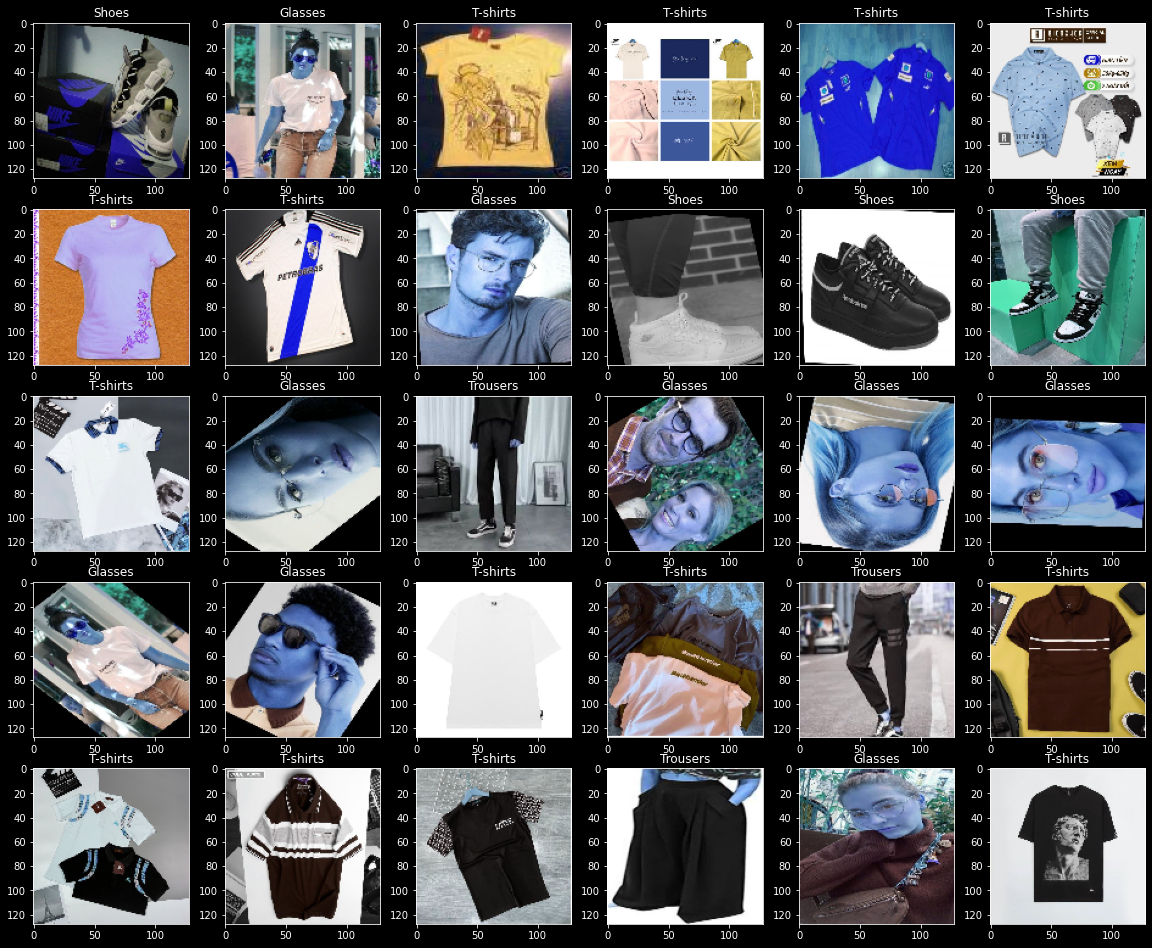

In [8]:
plt.figure(figsize=(20,20))
for n, i in enumerate(list(np.random.randint(0,len(X_train),30))):
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])
    plt.title(Categories[y_train[i]])   


CNN Model

In [9]:
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)


# Compile the model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Summary about the model

In [10]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0

Trainining the model

In [11]:
'''from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)'''
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,    
    verbose=1
)

Epoch 1/20
22/22 [==============================] - 62s 3s/step - loss: 1.2047 - accuracy: 0.4919 - val_loss: 1.0515 - val_accuracy: 0.5066
Epoch 2/20
22/22 [==============================] - 48s 2s/step - loss: 0.8392 - accuracy: 0.6362 - val_loss: 0.7723 - val_accuracy: 0.6645
Epoch 3/20
22/22 [==============================] - 65s 3s/step - loss: 0.6642 - accuracy: 0.7408 - val_loss: 0.6817 - val_accuracy: 0.6842
Epoch 4/20
22/22 [==============================] - 50s 2s/step - loss: 0.4909 - accuracy: 0.8233 - val_loss: 0.9037 - val_accuracy: 0.6250
Epoch 5/20
22/22 [==============================] - 49s 2s/step - loss: 0.4312 - accuracy: 0.8454 - val_loss: 0.6898 - val_accuracy: 0.6908
Epoch 6/20
22/22 [==============================] - 61s 3s/step - loss: 0.2909 - accuracy: 0.8895 - val_loss: 0.7345 - val_accuracy: 0.7566
Epoch 7/20
22/22 [==============================] - 46s 2s/step - loss: 0.2294 - accuracy: 0.9293 - val_loss: 0.6434 - val_accuracy: 0.7895
Epoch 8/20
22/22 [==

Testing the model


4/4 [==============================] - 1s 311ms/step - loss: 0.8310 - accuracy: 0.7745
Test accuracy: 0.7745097875595093
4/4 [==============================] - 1s 241ms/step


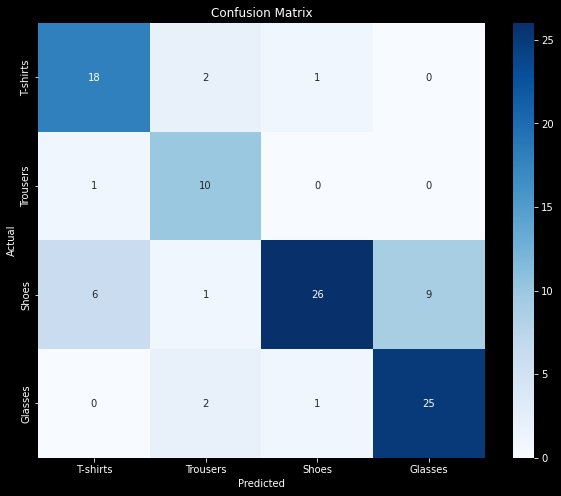

              precision    recall  f1-score   support

    T-shirts       0.72      0.86      0.78        21
    Trousers       0.67      0.91      0.77        11
       Shoes       0.93      0.62      0.74        42
     Glasses       0.74      0.89      0.81        28

    accuracy                           0.77       102
   macro avg       0.76      0.82      0.78       102
weighted avg       0.80      0.77      0.77       102



In [12]:
# Evaluate the model
testLoss, testAccuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {testAccuracy}")

# Predict on the test set
y_pred = model.predict(X_test)
#print(y_pred)
y_pred = np.argmax(y_pred, axis=1)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, cmap='Blues',annot=True,
            xticklabels=['T-shirts', 'Trousers', 'Shoes', 'Glasses'],
            yticklabels=['T-shirts', 'Trousers', 'Shoes', 'Glasses'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=['T-shirts', 'Trousers', 'Shoes', 'Glasses']))

Random sample from test

In [24]:
res=y_test==y_pred

In [25]:
res

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True,  True,
        True, False, False, False, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True])

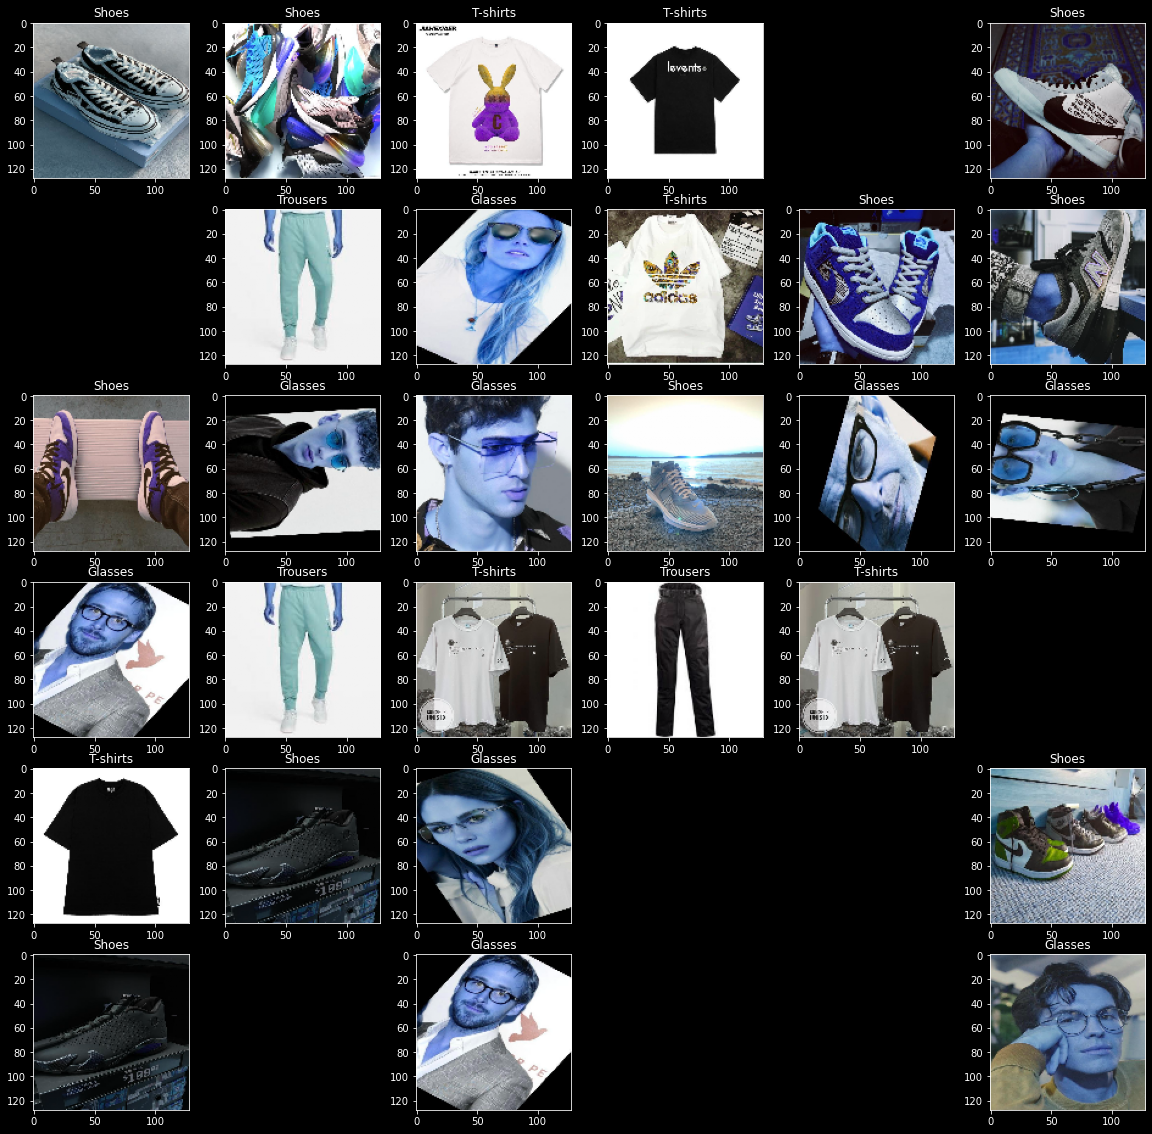

In [36]:
plt.figure(figsize=(20,20))
for n, i in enumerate(list(np.random.randint(0,len(res),36))):
    if res[i]==True:
      plt.subplot(6,6,n+1)
      plt.imshow(X_test[i])
      plt.title(Categories[y_pred[i]]) 
         
